## Objective
* __Create your own dataset that contains a random sample of reviews__

## Workflow

1. Read the video game review data. Take a look at the text of the reviews and the ratings, which you will work with in this milestone.Note that your data is not pure JSON, but new line delimited JSON. To be able to read it, install and import  <span style="color:red">ndjson</span>.
2. Create a plot of the ratings of the product. Study the distribution of the five categories.
3. Take a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller __balanced__ corpus, on which you will during Milestones 2-4. 
4. Take a random sample of the reviews by selecting 100,000 reviews. This way you get a bigger representative corpus, on which you will work in Milestones 4 and 5.
    * If you want to get identical results that are provided as a sample solution, use 42 as a random state.
5. Export your corpora to two separate .csv files. Both of your tables should contain a column for the reviews and a column for the ratings. From now on we call the review text of the JSON key “reviews” and the overall key “ratings.” Name your corpora small_corpus and big_corpus.


In [2]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# reading reviews from json file
with open('../data/Video_Games_5.json') as f:
    data = ndjson.load(f)

In [5]:
reviews_df = pd.DataFrame(data)

In [6]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


### Data Dictionry
   * __reviewerID__ - ID of the reviewer, e.g. A2SUAM1J3GNN3B
   * __asin__ - ID of the product, e.g. 0000013714
   * **reviewerName** - name of the reviewer
   * **vote** - helpful votes of the review
   * **style** - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
   * **reviewText** - text of the review
   * **overall** - rating of the product
   * **summary** - summary of the review
   * **unixReviewTime** - time of the review (unix time)
   * **reviewTime** - time of the review (raw)
   * **image** - images that users post after they have received the product

In [7]:
reviews_df.shape

(497577, 12)

In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


<AxesSubplot:xlabel='overall', ylabel='count'>

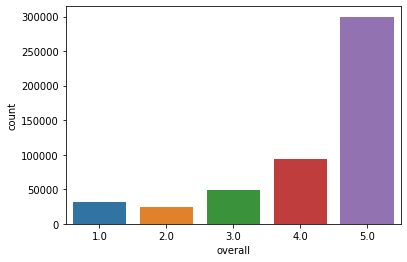

In [9]:
sns.countplot(data = reviews_df, x='overall')

In [12]:
len(reviews_df['asin'].value_counts(dropna=False))

17408

### Undersampling of Reviews
Taking a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller balanced corpus, on which you will during Milestones 2-4.

In [13]:
one_1500 = reviews_df[reviews_df['overall']==1.0].sample(n=1500)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=500)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=500)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five_1500 = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [14]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

In [15]:
undersampled_reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
307726,1.0,False,"06 16, 2015",A3159IXLXZHW9U,B00D2ZK1IG,Andrew Willette,bad controls. I felt like this game was a resi...,Resident Evil rip off,1434412800,NaN,{'Format:': ' Video Game'},NaN
259230,1.0,True,"07 7, 2012",A1TD2E11JK79I8,B005VKRGXI,M.K.,Update (July 10th 2012) - Condensed my review ...,Advertised but not delivered,1341619200,4,{'Platform:': ' PlayStation 3'},NaN
483177,1.0,True,"10 5, 2016",A1OMFWV9NZ7NIZ,B005DVAB1E,Christian Buehler,Achievement hunters only need apply.,One Star,1475625600,NaN,{'Platform:': ' Xbox 360'},NaN
461294,1.0,True,"10 17, 2017",A1NBZBNEBU3U3X,B0009350CQ,nana,ok,One Star,1508198400,NaN,{'Format:': ' Video Game'},NaN
7309,1.0,False,"06 19, 2012",A3J8ABVGK7ZL6H,B00002ST7X,Ishmael,Eternal Champions is an awesome game....for Se...,Sega CD version blows this one away!,1340064000,NaN,NaN,NaN


In [16]:
undersampled_reviews['overall'].value_counts(dropna=False)

1.0    1500
5.0    1500
2.0     500
3.0     500
4.0     500
Name: overall, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

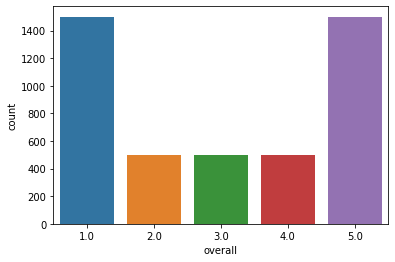

In [17]:
sns.countplot(data=undersampled_reviews, x='overall')

### Random Sampling of 100K Reviews

In [18]:
sample_100K_revs = reviews_df.sample(n=100000, random_state=42)

In [19]:
sample_100K_revs

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
364850,5.0,True,"12 17, 2015",A2DABQ8D1XJT05,B00KWEH61U,Maryann,Love this 3ds game. I made a zombie Togepi wit...,Love this 3ds game,1450310400,NaN,NaN,NaN
216628,5.0,True,"12 28, 2014",ANALWGWPY8HEA,B003S2JI82,John,Fun game,fun game,1419724800,NaN,{'Platform:': ' Nintendo Wii'},NaN
319038,5.0,True,"09 2, 2013",AZC9D5RVK7GR6,B00DTWES6I,Tye D. Reed,This game is so fun. I think it is the best S...,Wow sooooo awsome,1378080000,NaN,"{'Edition:': ' Deluxe', 'Platform:': ' PC Down...",NaN
440696,5.0,False,"01 15, 2018",A9SIXGGYKDBD,B01GKF7T9S,Jaguar 10,I hated the first game but absolutely love thi...,Don't let Watchdogs 1 Deter You - this game is...,1515974400,NaN,"{'Edition:': ' Standard', 'Platform:': ' PlayS...",NaN
287513,5.0,True,"04 9, 2015",A1WDH8O30ZC16S,B00B67ZTUW,Atomic Kitty,Love the Tales games. Glad I purchased this one.,"Great game, interactive for two players as well.",1428537600,NaN,{'Color:': ' Playstation 3'},NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
25721,4.0,True,"01 28, 2015",A1J1F06GHQY2F7,B00005NECC,Michael Curtiss,This is a good game though my son was too youn...,GOOD GAME,1422403200,NaN,"{'Edition:': ' Standard', 'Platform:': ' Game ...",NaN
250120,5.0,True,"09 7, 2011",A33GG85KTMLDSW,B0053OLY9O,OJ Silk,I am very pleased with this headset. The sound...,Kudos to Sony -- excellent headset for PS3 & PC,1315353600,4,NaN,NaN
394578,5.0,True,"01 23, 2017",A2S9KXJ24VRD5S,B00VHWMK44,Vince,kids love them,worth the pice,1485129600,NaN,"{'Color:': ' Splatoon 3-pack', 'Edition:': ' U...",NaN
472515,5.0,True,"06 11, 2013",A1Q671HPKJ50KD,B0018C1MF6,MAJIORLEAGUE,I read some of the reviews on this bag and the...,BETTER THAN I EXPECTED!,1370908800,NaN,NaN,NaN


In [20]:
undersampled_reviews.to_csv("../data/small_corpus.csv", index=False)

In [21]:
sample_100K_revs.to_csv("../data/big_corpus.csv", index=False)

Writing Corpora